In [1]:
import torch
import torchvision
from torch.nn import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
import cv2

In [2]:
!pwd
%cd /project/validating_attribution_techniques/commons/ScoreCAM
!pwd

/project/validating_attribution_techniques/commons
/project/validating_attribution_techniques/commons/ScoreCAM
/project/validating_attribution_techniques/commons/ScoreCAM


In [3]:
import os

os.environ['HTTP_PROXY'] = 'http://fp.cs.ovgu.de:3210/'
os.environ['HTTPS_PROXY'] = 'http://fp.cs.ovgu.de:3210/'

!git clone https://github.com/yiskw713/ScoreCAM.git

fatal: could not create work tree dir 'ScoreCAM': Permission denied


In [4]:
%matplotlib inline

import numpy as np
import skimage.transform
import torch
import torch.nn as nn
import torch.nn.functional as F
# from ScoreCAM import cam

from PIL import Image
from matplotlib.pyplot import imshow
from torchvision import models, transforms
from torchvision.utils import save_image

from cam import CAM, GradCAM, GradCAMpp, SmoothGradCAMpp, ScoreCAM
from utils.visualize import visualize, reverse_normalize
from utils.imagenet_labels import label2idx, idx2label

In [5]:
# Using a pretrained model for image classification
model = models.resnet18(pretrained=True)

/scratch/shkulkar/python/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/scratch/shkulkar/python/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Preprocessing Test Image

In [6]:
# preprocessing the test image

normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)

preprocess = transforms.Compose([
    transforms.ToTensor(),
    normalize
])

In [7]:
# the target layer you want to visualize

target_layer = model.layer4[1].conv2
print(target_layer)

Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


In [8]:
# Using the SmoothGradCAM logic to build the saliency map

wrapped_model1 = SmoothGradCAMpp(model, target_layer, n_samples=25, stdev_spread=0.15)
wrapped_model2 = ScoreCAM(model, target_layer)
wrapped_model3 = GradCAM(model, target_layer)

# Applying Occlusion to the Test Image

In [9]:
#Creating the patch
PATCH_SIZE = 60
def apply_grey_patch(path, image, top_left_x, top_left_y, patch_size):
    patched_image = np.array(image, copy=True)
    patched_image[top_left_y:top_left_y + patch_size, top_left_x:top_left_x + patch_size, :] = 0
    img = keras.preprocessing.image.array_to_img(patched_image)
    print(path)
    img.save(path)
    print(np.shape(patched_image))
    return patched_image

# Saving all Occluded versions of the Test Image

In [10]:
import tensorflow as tf
from tensorflow import keras

#Putting the patch over the image
image_path = "/project/validating_attribution_techniques/commons/cat_dog.jpeg"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image = tf.keras.preprocessing.image.img_to_array(image)


i = 0
# Iterate the patch over the image
for top_left_x in range(0, image.shape[0], PATCH_SIZE):
    for top_left_y in range(0, image.shape[1], PATCH_SIZE):
        # Apply the patch and display the image
        path = "/project/validating_attribution_techniques/commons/Occluded_Images/occluded_img_" + str(i) + ".jpg"
        i+=1
        patched_image = apply_grey_patch(path,image, top_left_x, top_left_y, PATCH_SIZE)
        patched_image = patched_image.astype('float32') / 255.0
#         n_patched_image 

2023-06-09 02:17:39.294515: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 02:17:42.786524: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /scratch/shkulkar/python/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/cuda-11.3/lib64:/scratch/shkulkar/python/lib:/usr/local/cuda-11.3/tensorRT-8.0/lib64:/usr/local/cuda-11.3/cudnn-8.2/lib64:/usr/local/cuda-11.3/nccl-2.9/lib64
2023-06-09 02:17:42.786915: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.

/project/validating_attribution_techniques/commons/Occluded_Images/occluded_img_0.jpg
(224, 224, 3)
/project/validating_attribution_techniques/commons/Occluded_Images/occluded_img_1.jpg
(224, 224, 3)
/project/validating_attribution_techniques/commons/Occluded_Images/occluded_img_2.jpg
(224, 224, 3)
/project/validating_attribution_techniques/commons/Occluded_Images/occluded_img_3.jpg
(224, 224, 3)
/project/validating_attribution_techniques/commons/Occluded_Images/occluded_img_4.jpg
(224, 224, 3)
/project/validating_attribution_techniques/commons/Occluded_Images/occluded_img_5.jpg
(224, 224, 3)
/project/validating_attribution_techniques/commons/Occluded_Images/occluded_img_6.jpg
(224, 224, 3)
/project/validating_attribution_techniques/commons/Occluded_Images/occluded_img_7.jpg
(224, 224, 3)
/project/validating_attribution_techniques/commons/Occluded_Images/occluded_img_8.jpg
(224, 224, 3)
/project/validating_attribution_techniques/commons/Occluded_Images/occluded_img_9.jpg
(224, 224, 3)


# Applying SmoothGradCAM++ on the Occluded Test Images

/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.007998972199857235
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008564108051359653
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008605138398706913
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008360844105482101
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008471029810607433
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.00822388380765915
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008824717253446579
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008280991576611996
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008374751545488834
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.00841719564050436
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008645332418382168
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008131146430969238
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008447457104921341
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.00893392600119114
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008586426265537739
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.00854874961078167
bucket, pail


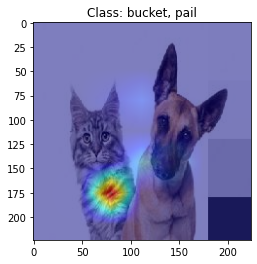

In [11]:
fig, ax = plt.subplots()

for i in range(0,16):
        img = tf.keras.preprocessing.image.load_img("/project/validating_attribution_techniques/commons/Occluded_Images/occluded_img_" + str(i) + ".jpg")
        tensor = preprocess(img) # converting image to tensor
        tensor = tensor.unsqueeze(0) # reshape 4D tensor (N, C, H, W); N:batch size, C: Channels, H: Height of tensor, W: Width of tensor
        cam, idx = wrapped_model1(tensor)
        print(idx2label[idx])
        img = reverse_normalize(tensor)
        heatmap = visualize(img, cam)
        heatmap = np.transpose(heatmap.squeeze(), (1, 2, 0))
        ax.imshow(heatmap, cmap='turbo', alpha = 0.8)
        ax.set_title(f"Class: {idx2label[idx]}")
        fig.savefig(f"/project/validating_attribution_techniques/commons/Occlusion_SmoothGradCAMpp/{i}_{idx2label[idx]}.jpg")

# Using Saliency Map Metrics (Single Step)

In [12]:
# !pip install saliency-maps-metrics

In [13]:
from saliency_maps_metrics.single_step_metrics import IIC_AD, ADD 
from saliency_maps_metrics.multi_step_metrics import Deletion, Insertion

# IIC - Increase in Confidence

In [14]:
iic_ad = IIC_AD()
result_dic = iic_ad(model,tensor,cam,idx)  
iic_mean,ad_mean = result_dic["iic"],result_dic["ad"]
print("IIC",iic_mean)
print("AD",ad_mean)

IIC 0.0
AD 0.02466087


# ADD - Average drop in Deletion 

In [15]:
add = ADD()
result_dic = add(model,tensor,cam,idx) 
add_mean = result_dic["add"]
print("ADD",add_mean)

ADD 0.0044583417


# Using Saliency Map Metrics (Multi Step)

In [16]:
cam = torch.nn.functional.interpolate(cam,(3,3))

In [17]:
# class Deletion(MultiStepMetric):
#     def __init__(self,data_replace_method="black",bound_max_step=True,batch_size=20,max_step_nb=14*14,cumulative=True):
#         super().__init__(data_replace_method,bound_max_step,batch_size,max_step_nb,cumulative)

#     def choose_data_order(self,data,masking_data):
#         return {"data1":data,"data2":masking_data}

#     def compute_calibration_metric(self, all_score_list, all_sal_score_list):
#         if self.cumulative:
#             score_var = all_score_list[:,:-1] - all_score_list[:,1:] 
#         else:
#             score_var = all_score_list[:,0:1] - all_score_list[:,1:] 
#         return compute_correlation(score_var, all_sal_score_list)

#     def make_result_dic(self,auc_metric,calibration_metric):
#         return {"dauc":auc_metric,"dc":calibration_metric}

# DAUC - Deletion Area Under Curve

In [18]:
deletion = Deletion(data_replace_method="black", bound_max_step=True, batch_size=20, max_step_nb=14*14, cumulative=True)

scalar_tensor = torch.tensor(idx)
idx1 = torch.unsqueeze(scalar_tensor, 0)
result_dic = deletion(model,tensor,cam,idx1)

dauc = result_dic["dauc"]
dc = result_dic["dc"]
print("DAUC",dauc)
print("DC",dc)

DAUC 2.4131510257720947
DC -0.14994806222673446


# IAUC - Insertion Area Under Curve

In [19]:
insertion = Insertion(data_replace_method="blur", bound_max_step=True, batch_size=20, max_step_nb=14*14, cumulative=True)
scalar_tensor = torch.tensor(idx)
idx2 = torch.unsqueeze(scalar_tensor, 0)
result_dic = insertion(model,tensor.clone(),cam.clone(),idx2)
iauc_mean = result_dic["iauc"]
ic_mean = result_dic["ic"]
print("IAUC",iauc_mean) 
print("IC",ic_mean)

IAUC 2.430049432648553
IC 0.08624203195063351


# Applying GradCAM on Occluded Test Images

predicted class ids 463	 probability 0.00799716729670763
bucket, pail
predicted class ids 463	 probability 0.008567197248339653


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


bucket, pail
predicted class ids 463	 probability 0.008456027135252953
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008422281593084335
bucket, pail
predicted class ids 463	 probability 0.008619608357548714
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008557425811886787
bucket, pail
predicted class ids 463	 probability 0.008808275684714317


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


bucket, pail
predicted class ids 463	 probability 0.008387059904634953


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


bucket, pail
predicted class ids 463	 probability 0.008542293682694435
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008565863594412804
bucket, pail
predicted class ids 463	 probability 0.008318694308400154
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008272589184343815


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


bucket, pail
predicted class ids 463	 probability 0.008411085233092308
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.009144536219537258
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008616124279797077
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008456670679152012
bucket, pail


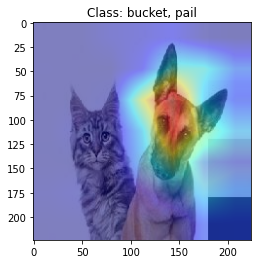

In [20]:
fig, ax = plt.subplots()

for i in range(0,16):
        img = tf.keras.preprocessing.image.load_img("/project/validating_attribution_techniques/commons/Occluded_Images/occluded_img_" + str(i) + ".jpg")
        tensor = preprocess(img) # converting image to tensor
        tensor = tensor.unsqueeze(0) # reshape 4D tensor (N, C, H, W); N:batch size, C: Channels, H: Height of tensor, W: Width of tensor
        cam, idx = wrapped_model3(tensor)
        print(idx2label[idx])
        img = reverse_normalize(tensor)
        heatmap = visualize(img, cam)
        heatmap = np.transpose(heatmap.squeeze(), (1, 2, 0))
        ax.imshow(heatmap, cmap='turbo', alpha = 0.8)
        ax.set_title(f"Class: {idx2label[idx]}")
        fig.savefig(f"/project/validating_attribution_techniques/commons/Occlusion_GradCAM/{i}_{idx2label[idx]}.jpg")

# Using Saliency Map Metrics (Multi Step)

In [21]:
cam = torch.nn.functional.interpolate(cam,(3,3))

# DAUC - Deletion Area Under Curve

In [22]:
deletion = Deletion(data_replace_method="black", bound_max_step=True, batch_size=20, max_step_nb=14*14, cumulative=True)

scalar_tensor = torch.tensor(idx)
idx1 = torch.unsqueeze(scalar_tensor, 0)
result_dic = deletion(model,tensor,cam,idx1)

dauc = result_dic["dauc"]
dc = result_dic["dc"]
print("DAUC",dauc)
print("DC",dc)

DAUC 2.492581261528863
DC -0.36189760701717444


# IAUC - Insertion Area Under Curve

In [23]:
insertion = Insertion(data_replace_method="blur", bound_max_step=True, batch_size=20, max_step_nb=14*14, cumulative=True)
scalar_tensor = torch.tensor(idx)
idx2 = torch.unsqueeze(scalar_tensor, 0)
result_dic = insertion(model,tensor.clone(),cam.clone(),idx2)
iauc_mean = result_dic["iauc"]
ic_mean = result_dic["ic"]
print("IAUC",iauc_mean) 
print("IC",ic_mean)

IAUC 2.339572800530328
IC -0.2657537065521292


# Applying ScoreCAM on the Occluded Test Images

/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.007832112722098827
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.0084387781098485
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008596783503890038
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.00829695351421833
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008142644539475441
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008124959655106068
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008862252347171307
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008263643831014633
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.00839004386216402
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.00835751835256815
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008300218731164932
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008395424112677574
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008676835335791111
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.009091227315366268
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.008672120980918407
bucket, pail


/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.00862424448132515
bucket, pail


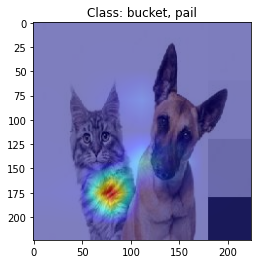

In [24]:
fig, ax = plt.subplots()

for i in range(0,16):
        img = tf.keras.preprocessing.image.load_img("/project/validating_attribution_techniques/commons/Occluded_Images/occluded_img_" + str(i) + ".jpg")
        tensor = preprocess(img) # converting image to tensor
        tensor = tensor.unsqueeze(0) # reshape 4D tensor (N, C, H, W); N:batch size, C: Channels, H: Height of tensor, W: Width of tensor
        cam, idx = wrapped_model1(tensor)
        print(idx2label[idx])
        img = reverse_normalize(tensor)
        heatmap = visualize(img, cam)
        heatmap = np.transpose(heatmap.squeeze(), (1, 2, 0))
        ax.imshow(heatmap, cmap='turbo', alpha = 0.8)
        ax.set_title(f"Class: {idx2label[idx]}")
        fig.savefig(f"/project/validating_attribution_techniques/commons/Occlusion_ScoreCAM/{i}_{idx2label[idx]}.jpg")

# Using Saliency Map Metrics (Multi Step)

In [25]:
cam = torch.nn.functional.interpolate(cam,(3,3))

# DAUC - Deletion Area Under Curve

In [26]:
deletion = Deletion(data_replace_method="black", bound_max_step=True, batch_size=20, max_step_nb=14*14, cumulative=True)

scalar_tensor = torch.tensor(idx)
idx1 = torch.unsqueeze(scalar_tensor, 0)
result_dic = deletion(model,tensor,cam,idx1)

dauc = result_dic["dauc"]
dc = result_dic["dc"]
print("DAUC",dauc)
print("DC",dc)

DAUC 2.490460183885362
DC -0.019982885330847657


# IAUC - Insertion Area Under Curve

In [27]:
insertion = Insertion(data_replace_method="blur", bound_max_step=True, batch_size=20, max_step_nb=14*14, cumulative=True)
scalar_tensor = torch.tensor(idx)
idx2 = torch.unsqueeze(scalar_tensor, 0)
result_dic = insertion(model,tensor.clone(),cam.clone(),idx2)
iauc_mean = result_dic["iauc"]
ic_mean = result_dic["ic"]
print("IAUC",iauc_mean) 
print("IC",ic_mean)

IAUC 2.4691420131259494
IC 0.09946069871267095


# Adding Noise to Test Image

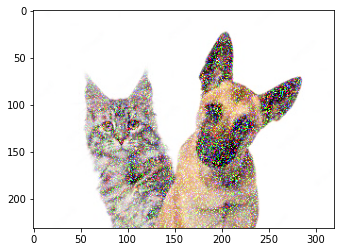

In [28]:
#Adding noise to the original image

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mean = 0
variance = 1.5
stddev = variance ** 0.5
noise = np.random.normal(mean, stddev, image.shape).astype(np.uint8)
image = cv2.add(image, noise)

imshow(image)

/scratch/shkulkar/python/lib/python3.8/site-packages/torch/nn/modules/module.py:1053: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted class ids 463	 probability 0.00830225832760334
bucket, pail


Text(0.5, 1.0, 'Class: bucket, pail')

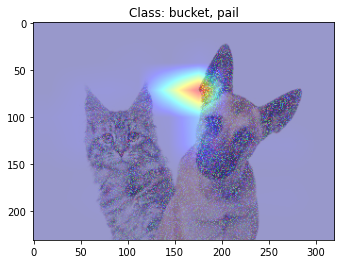

In [29]:
fig, ax = plt.subplots()

tensor = preprocess(image) # converting image to tensor
tensor = tensor.unsqueeze(0) # reshape 4D tensor (N, C, H, W); N:batch size, C: Channels, H: Height of tensor, W: Width of tensor
cam, idx = wrapped_model1(tensor)
print(idx2label[idx])
img = reverse_normalize(tensor)
heatmap = visualize(img, cam)
heatmap = np.transpose(heatmap.squeeze(), (1, 2, 0))
ax.imshow(heatmap, cmap='turbo', alpha = 0.8)
#     ax.set_title(f"Class: {idx2label[idx]}({prob*100:.2f}%)")
ax.set_title(f"Class: {idx2label[idx]}")
# fig.savefig(f"/project/validating_attribution_techniques/commons/Saliency_Map_Occlusion/{i}_{idx2label[idx]}.jpg")
#save_image(heatmap, '/content/drive/MyDrive/Deep Learning Projects/Fooling attribution techniques/Saliency_Map/'+str(i)+'_{}.jpeg'.format(idx2label[idx])) #.set_title(f"Class: {idx2label[idx]} ({prob*100:.2f}%)"))

In [30]:
# from saliency_maps_metrics.multi_step_metrics import Deletion
# import inspect

# # Get the source code of the Deletion function
# source_code = inspect.getsource(Deletion)

# # Print the source code
# print(source_code)